##### Adjust Directory and Libraries

---



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import  PCA
from sklearn.neural_network import BernoulliRBM
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import History 
from tensorflow.keras.utils import to_categorical
from sklearn import metrics
import urllib.request
from keras.datasets import cifar10
from keras import backend as K
import keras
from keras import layers
from time import time
import seaborn as sns
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions

##### Load Data
---



In [2]:
# load data

((x, y), (x_test, y_test)) = cifar10.load_data()
x = x/255
x_test = x_test/255

170500096/170498071 [==============================] - 3s 0us/step


In [3]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.1, random_state=101)

In [4]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
y_valid = to_categorical(y_valid,10)

In [5]:
xtrain = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
xvalid = x_valid.reshape((len(x_valid), np.prod(x_valid.shape[1:])))
xtest = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

##### Auto Encoding
---



###### Auto Encoder Network

In [6]:
def prod(val) :  
    res = 1 
    for ele in val:  
        res *= ele  
    return res   

encoding_dim = (11,3,3)


input_img = keras.Input(shape=(3072,))

encoded = layers.Dense(prod(encoding_dim), activation='relu')(input_img)

decoded = layers.Dense(3072, activation='sigmoid')(encoded)


autoencoder = keras.Model(input_img, decoded)
encoder = keras.Model(input_img, encoded)

encoded_input = keras.Input(shape=(prod(encoding_dim),))
decoder_layer = autoencoder.layers[-1]

decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy')

autoencoder.fit(xtrain, xtrain,
                epochs=15,
                batch_size=256,
                shuffle=True,
                verbose=2,
                validation_data=(xvalid, xvalid))

Epoch 1/15
176/176 - 7s - loss: 0.6433 - val_loss: 0.6216
Epoch 2/15
176/176 - 7s - loss: 0.6157 - val_loss: 0.6108
Epoch 3/15
176/176 - 7s - loss: 0.6068 - val_loss: 0.6038
Epoch 4/15
176/176 - 7s - loss: 0.6014 - val_loss: 0.5988
Epoch 5/15
176/176 - 7s - loss: 0.5972 - val_loss: 0.5951
Epoch 6/15
176/176 - 7s - loss: 0.5949 - val_loss: 0.5926
Epoch 7/15
176/176 - 7s - loss: 0.5921 - val_loss: 0.5905
Epoch 8/15
176/176 - 7s - loss: 0.5898 - val_loss: 0.5892
Epoch 9/15
176/176 - 7s - loss: 0.5890 - val_loss: 0.5887
Epoch 10/15
176/176 - 7s - loss: 0.5880 - val_loss: 0.5873
Epoch 11/15
176/176 - 7s - loss: 0.5875 - val_loss: 0.5871
Epoch 12/15
176/176 - 7s - loss: 0.5870 - val_loss: 0.5871
Epoch 13/15
176/176 - 7s - loss: 0.5869 - val_loss: 0.5867
Epoch 14/15
176/176 - 7s - loss: 0.5871 - val_loss: 0.5871
Epoch 15/15
176/176 - 7s - loss: 0.5866 - val_loss: 0.5872


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


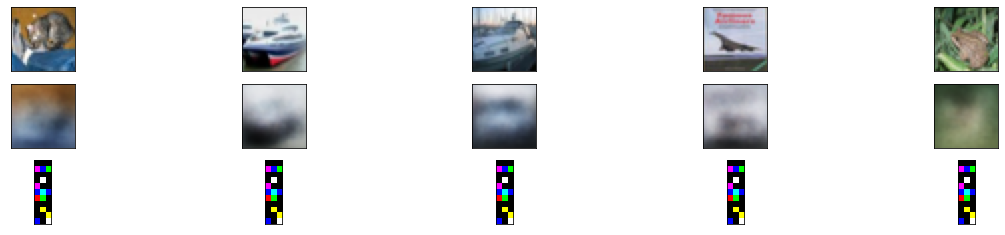

In [7]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)


n = 5 
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(xtest[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display encod
    ax = plt.subplot(3, n, i + 1 + 2* n)
    plt.imshow(encoded_imgs[i].reshape(encoding_dim))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

###### MLP NN (Auto Encoder)

In [8]:
x_train_encoded = encoder.predict(xtrain)
x_valid_encoded = encoder.predict(xvalid)
x_test_encoded = encoder.predict(xtest)

In [9]:

history = History()

model = Sequential()
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

# Configure the model and start training
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

K.set_value(model.optimizer.learning_rate, 0.0001)

model.fit(x=x_train_encoded,y=y_train,
          validation_data=(x_valid_encoded,y_valid),
          batch_size=256,epochs=15, verbose=2,
          callbacks=[history])


Epoch 1/15
176/176 - 7s - loss: 2.1047 - accuracy: 0.0988 - val_loss: 1.9743 - val_accuracy: 0.1062
Epoch 2/15
176/176 - 7s - loss: 1.9426 - accuracy: 0.0995 - val_loss: 1.9241 - val_accuracy: 0.1066
Epoch 3/15
176/176 - 7s - loss: 1.8134 - accuracy: 0.2608 - val_loss: 1.6839 - val_accuracy: 0.4024
Epoch 4/15
176/176 - 7s - loss: 1.6565 - accuracy: 0.4098 - val_loss: 1.6674 - val_accuracy: 0.4120
Epoch 5/15
176/176 - 6s - loss: 1.6130 - accuracy: 0.4262 - val_loss: 1.6263 - val_accuracy: 0.4196
Epoch 6/15
176/176 - 6s - loss: 1.5818 - accuracy: 0.4364 - val_loss: 1.6050 - val_accuracy: 0.4294
Epoch 7/15
176/176 - 6s - loss: 1.5643 - accuracy: 0.4436 - val_loss: 1.6025 - val_accuracy: 0.4276
Epoch 8/15
176/176 - 6s - loss: 1.5427 - accuracy: 0.4517 - val_loss: 1.5857 - val_accuracy: 0.4444
Epoch 9/15
176/176 - 6s - loss: 1.5292 - accuracy: 0.4566 - val_loss: 1.5582 - val_accuracy: 0.4432
Epoch 10/15
176/176 - 6s - loss: 1.5200 - accuracy: 0.4605 - val_loss: 1.5499 - val_accuracy: 0.4500

###### Plots and Evaluation (Auto Encoder)

In [10]:
print(model.summary())
loss, acc = model.evaluate(x_test_encoded, y_test, verbose=0)
print('test loss = ', loss)
print('test accuracy = ', acc)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1000)              100000    
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 1,111,010
Trainable params: 1,111,010
Non-trainable params: 0
_________________________________________________________________
None
test loss =  1.4852793216705322
test accuracy =  0.47429999709129333


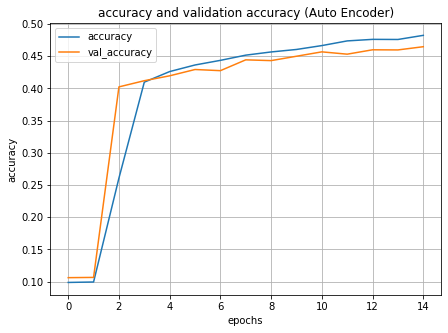

In [11]:
acc = pd.DataFrame({'accuracy':history.history['accuracy'],
                     'val_accuracy':history.history['val_accuracy']})
acc.plot(figsize=(7,5))
plt.xlabel('epochs'), plt.ylabel('accuracy'), plt.title('accuracy and validation accuracy (Auto Encoder)')
plt.grid()

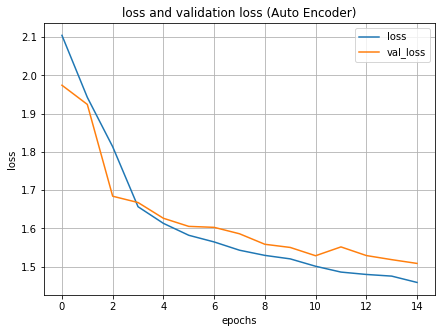

In [12]:
acc = pd.DataFrame({'loss':history.history['loss'],
                     'val_loss':history.history['val_loss']})
acc.plot(figsize=(7,5))
plt.xlabel('epochs'), plt.ylabel('loss'), plt.title('loss and validation loss (Auto Encoder)')
plt.grid()

##### PCA

###### PCA Algorithm

In [13]:

def PcA(dataset, num_comp):
  X_cov = np.cov(xtrain.T)
  eig_vals, eig_vecs = np.linalg.eig(X_cov)
  eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
  eig_pairs.sort(key=lambda x: x[0], reverse=True)
  w = np.zeros((len(eig_vals),num_comp))
  for i in range(num_comp):
    w[:,i] = eig_pairs[i][1]
  return dataset.dot(w)

###### MLP NN (PCA)

In [14]:
x_train_pca = PcA(xtrain, prod(encoding_dim))
x_valid_pca = PcA(xvalid, prod(encoding_dim))
x_test_pca = PcA(xtest, prod(encoding_dim))

In [15]:

history = History()

model = Sequential()
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

# Configure the model and start training
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

K.set_value(model.optimizer.learning_rate, 0.0001)

model.fit(x=x_train_pca,y=y_train,
          validation_data=(x_valid_pca,y_valid),
          batch_size=256,epochs=15, verbose=2,
          callbacks=[history])


Epoch 1/15
176/176 - 7s - loss: 1.8637 - accuracy: 0.3402 - val_loss: 1.6998 - val_accuracy: 0.4216
Epoch 2/15
176/176 - 6s - loss: 1.6239 - accuracy: 0.4310 - val_loss: 1.6055 - val_accuracy: 0.4462
Epoch 3/15
176/176 - 7s - loss: 1.5341 - accuracy: 0.4627 - val_loss: 1.5351 - val_accuracy: 0.4706
Epoch 4/15
176/176 - 7s - loss: 1.4727 - accuracy: 0.4852 - val_loss: 1.5052 - val_accuracy: 0.4848
Epoch 5/15
176/176 - 7s - loss: 1.4214 - accuracy: 0.5044 - val_loss: 1.4670 - val_accuracy: 0.4966
Epoch 6/15
176/176 - 6s - loss: 1.3749 - accuracy: 0.5241 - val_loss: 1.4535 - val_accuracy: 0.4930
Epoch 7/15
176/176 - 7s - loss: 1.3353 - accuracy: 0.5356 - val_loss: 1.4340 - val_accuracy: 0.5012
Epoch 8/15
176/176 - 6s - loss: 1.3012 - accuracy: 0.5495 - val_loss: 1.4075 - val_accuracy: 0.5152
Epoch 9/15
176/176 - 7s - loss: 1.2639 - accuracy: 0.5598 - val_loss: 1.3890 - val_accuracy: 0.5184
Epoch 10/15
176/176 - 7s - loss: 1.2359 - accuracy: 0.5720 - val_loss: 1.3852 - val_accuracy: 0.5224

###### Plots and Evaluation (PCA)

In [16]:
print(model.summary())
loss, acc = model.evaluate(x_test_pca, y_test, verbose=0)
print('test loss = ', loss)
print('test accuracy = ', acc)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1000)              100000    
_________________________________________________________________
dense_6 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                10010     
Total params: 1,111,010
Trainable params: 1,111,010
Non-trainable params: 0
_________________________________________________________________
None
test loss =  1.327599287033081
test accuracy =  0.5296000242233276


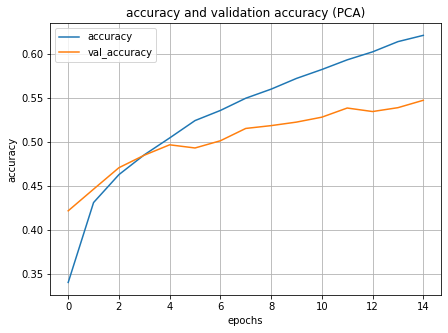

In [17]:
acc = pd.DataFrame({'accuracy':history.history['accuracy'],
                     'val_accuracy':history.history['val_accuracy']})
acc.plot(figsize=(7,5))
plt.xlabel('epochs'), plt.ylabel('accuracy'), plt.title('accuracy and validation accuracy (PCA)')
plt.grid()

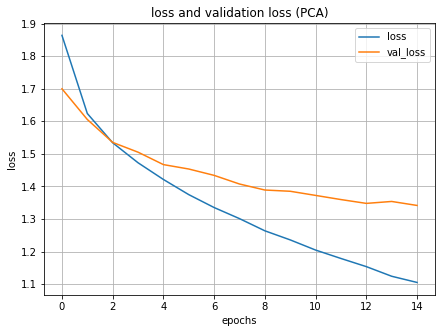

In [18]:
acc = pd.DataFrame({'loss':history.history['loss'],
                     'val_loss':history.history['val_loss']})
acc.plot(figsize=(7,5))
plt.xlabel('epochs'), plt.ylabel('loss'), plt.title('loss and validation loss (PCA)')
plt.grid()